#Uvod

yfinance je python-ov paket koji nam omogućuje dohvaćanje povijesnih tržišnih podataka iz Yahoo Finance API-ja (usluga koja pruža financijske informacije pa tako i informacije o dionicama)

In [ ]:
!pip install yfinance

#Importanje biblioteka potrebnih za rad

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import yfinance as yf
from sklearn.model_selection import train_test_split
import datetime as time
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU

Uplodamo podatke, odnosno ponašanje vrijedosti(cijene) bitcoina od 17.rujna 2017.g. do danas .

In [ ]:
data=yf.download("BTC-USD",start='2017-09-17', end=time.date.today())

[*********************100%%**********************]  1 of 1 completed


**Objašnjenje stupaca**
<br>*Open - the opening price* - Prva cijena
<br>*High - the highest price* - Najviša
<br>*Low - the lowest price* -Najniža
<br>*Close - the closing price* -Zadnja
<br>*Adj Close - the closing price after adjustments for splits and dividend* -
<br>*Volume- total stocks traded* - Promet


In [ ]:
df=data

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-17,3606.280029,3664.810059,3445.639893,3582.879883,3582.879883,1239149952
2017-09-18,3591.090088,4079.229980,3591.090088,4065.199951,4065.199951,1943209984
2017-09-19,4073.790039,4094.070068,3868.870117,3924.969971,3924.969971,1563980032
2017-09-20,3916.360107,4031.389893,3857.729980,3905.949951,3905.949951,1213830016
2017-09-21,3901.469971,3916.419922,3613.629883,3631.040039,3631.040039,1411480064
...,...,...,...,...,...,...
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,25752407154
2024-01-20,41624.589844,41877.894531,41446.824219,41665.585938,41665.585938,11586690904
2024-01-21,41671.488281,41855.367188,41497.007812,41545.785156,41545.785156,9344043642


Iz podataka ćemo izbaciti ukupni promet dana (Volume) i završnu cijenu nakon ispravka zbog podjele i dividende (Adj Close) - obzirom da se radi o kriptovaluti Close i Adj Close cijena su iste jer nema naknadi.

In [ ]:
data.index

DatetimeIndex(['2017-09-17', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-21', '2017-09-22', '2017-09-23', '2017-09-24',
               '2017-09-25', '2017-09-26',
               ...
               '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=2320, freq=None)

In [ ]:
data=data.drop('Volume',axis=1)

In [ ]:
data=data.drop('Adj Close',axis=1)

**data.describe()** nam daje

*   broj podataka
*   srednju vrijednost
*   standardnu devijaciju
*   minimum
*   25%, 50% i 70%
*   maksimum

#Analiza podataka


In [ ]:
data.describe()

,Open,High,Low,Close
count,2320.000000,2320.000000,2320.000000,2320.000000
mean,21364.432858,21861.493937,20826.476125,21378.189114
std,15979.200078,16367.348166,15535.757973,15975.910624
min,3236.274658,3275.377930,3191.303467,3236.761719
25%,8161.269165,8289.237549,7929.757568,8164.680420
50%,16602.971680,16811.457031,16335.834961,16607.585938
75%,31549.079590,32581.377441,30291.848145,31647.507812
max,67549.734375,68789.625000,66382.062500,67566.828125


In [ ]:
data.iloc[0]

Open     3606.280029
High     3664.810059
Low      3445.639893
Close    3582.879883
Name: 2017-09-17 00:00:00, dtype: float64

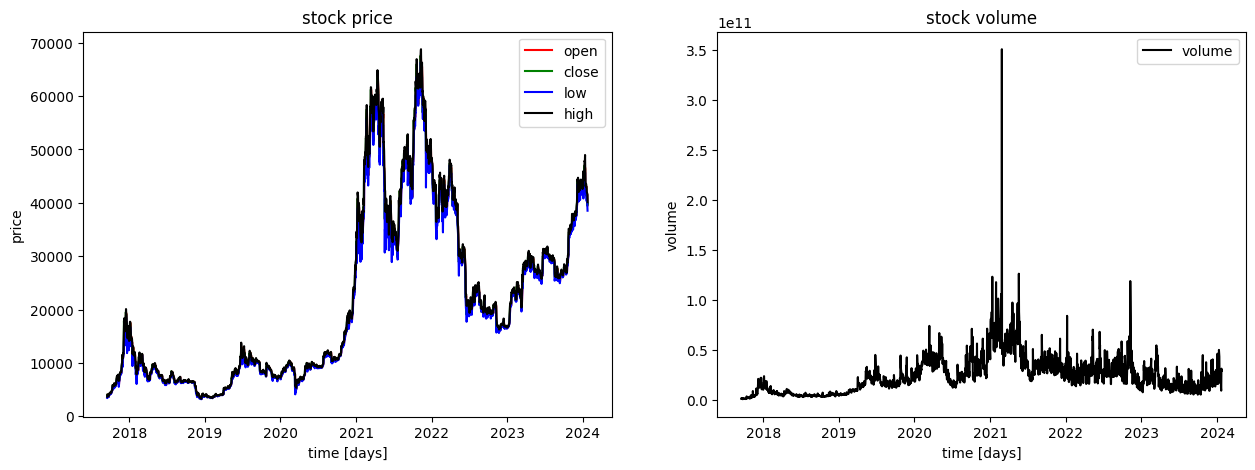

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['Open'], color='red', label='open')
plt.plot(df['Close'], color='green', label='close')
plt.plot(df['Low'], color='blue', label='low')
plt.plot(df['High'], color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df['Volume'], color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

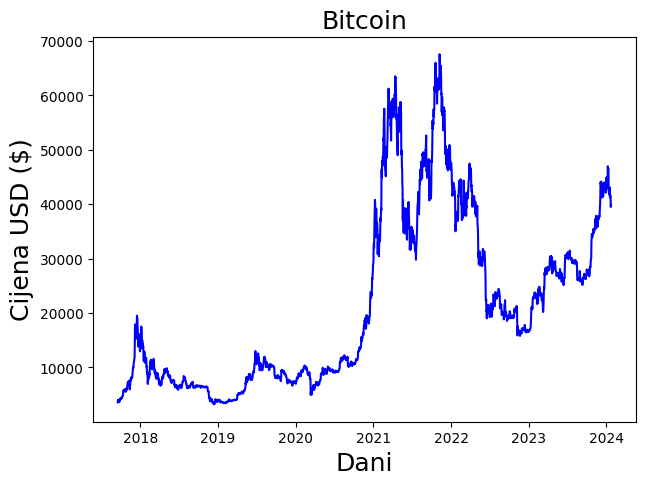

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Bitcoin', fontsize = 18)
plt.xlabel('Dani', fontsize= 18)
plt.ylabel('Cijena USD ($)', fontsize = 18)
plt.plot(data['Close'], color='blue')
plt.show()

Graf koji prikazuje odnos prve i zadnje cijene nam govori koliko je je vrijedsnot dionice u danu pala ili narasla.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2320 entries, 2017-09-17 to 2024-01-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2320 non-null   float64
 1   High    2320 non-null   float64
 2   Low     2320 non-null   float64
 3   Close   2320 non-null   float64
dtypes: float64(4)
memory usage: 90.6 KB


Text(1.0, 1.0, 'najniža cijena')

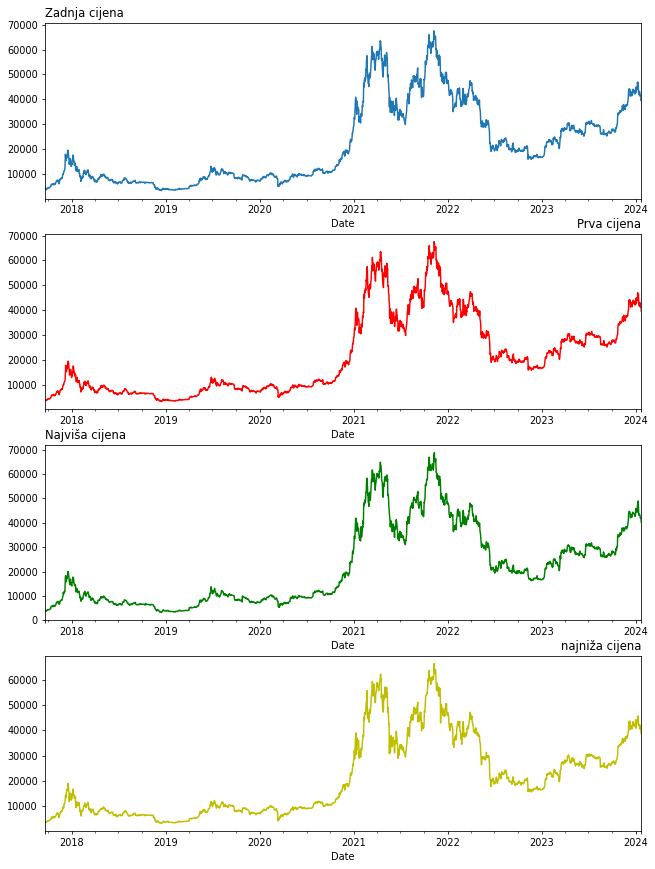

In [ ]:
plt.figure(figsize=(11,15),dpi=70)
plt.subplot(411)
data.Close.plot()
plt.title("Zadnja cijena",loc="left")
plt.subplot(412)
data.Open.plot(c="r")
plt.title("Prva cijena",loc="right")
plt.subplot(413)
data.High.plot(c="g")
plt.title("Najviša cijena",loc="left")
plt.subplot(414)
data.Low.plot(c="y")
plt.title("najniža cijena",loc="right")

Idući graf prikazuje odnos najviše i najniže vrijdensoti bitcoina u danu. Iz grafa je moguće vidjeti kolika je bila oscilacija u vrijednosti bitcoin u danu. Obzirom da vidimo da su sve točke blizu dijagonale, zaključujamo da velikih oscijalcija nije bilo.
<br>Inače ukoliko takvih točaka, koje zovemo outlineri, čije vrijednosti značajno odstupaju od većine, te točke se ne promatraju, tj. izbace se iz skupa podataka na kojem se vrši analiza.

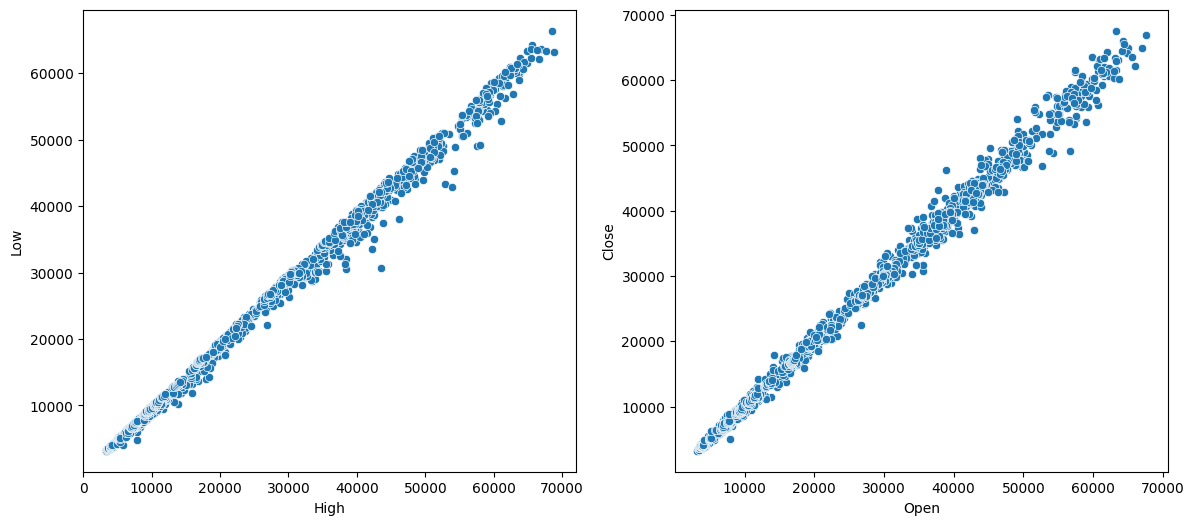

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sb.scatterplot(data, x="High", y="Low")

plt.subplot(1,2,2)
sb.scatterplot(data, x="Open",y="Close")
plt.show()

In [ ]:
data.corr()

,Open,High,Low,Close
Open,1.000000,0.999231,0.998658,0.998211
High,0.999231,1.000000,0.998428,0.999193
Low,0.998658,0.998428,1.000000,0.999046
Close,0.998211,0.999193,0.999046,1.000000


Iduća tablica  i heatmap prikazuju korelaciju među cijenama dionca (prve, zadnje, najviše, najniže).
<br>Iz tablice je vidljivo da je korelacija među cijenama 1 ( ako zaokružujemo na dvije decimale, ako što je vidjivo u heatmap-u)
<br>To znači da vrijednost jedne varijable ovisi o drugoj i obratno.

<Axes: >

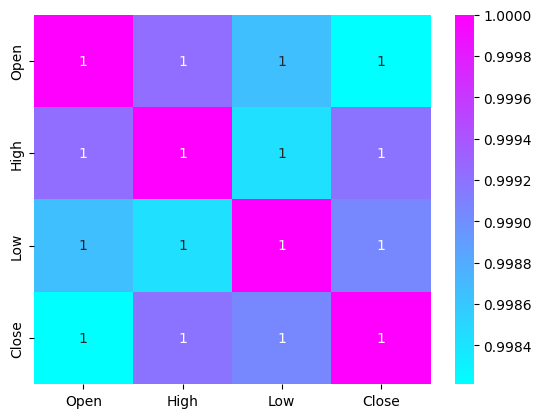

In [ ]:
sb.heatmap(data.corr(),annot=True,linewidths=0.0001,cmap='cool')

In [ ]:
podaci=data['2020':'2021'].iloc[:,0:4]
podaci['date']=podaci.index
podaci

,Open,High,Low,Close,date
Date,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,2020-01-01
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,2020-01-02
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,2020-01-03
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,2020-01-04
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,2020-01-05
...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,2021-12-27
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,2021-12-28
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,2021-12-29


In [ ]:
monthvise= podaci.groupby(podaci['date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')
monthvise.head()

,Open,Close
date,,
January,21485.955645,21575.460213
July,21876.798151,22017.436760
June,22710.171973,22667.190951
February,27447.882812,27647.040604
May,28171.795016,27853.219207


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Prva cijena',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Zadnja cijena',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Mjesečna usporedba između prve i zadnje cijene dionice u godini 2020.')
fig.show()

In [ ]:
podaci.groupby(podaci['date'].dt.strftime('%B'))['Low'].min()

date
April         6202.373535
August       11012.415039
December     17619.533203
February      8492.932617
January       6914.996094
July          8977.015625
June          8975.525391
March         4106.980957
May           8374.323242
November     13243.160156
October      10416.689453
September     9916.493164
Name: Low, dtype: float64

In [ ]:
monthvise_high= podaci.groupby(podaci['date'].dt.strftime('%B'))['High'].max()
monthvise_low= podaci.groupby(podaci['date'].dt.strftime('%B'))['Low'].min()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Najviša cijena',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Najniža cijena',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Mjesečna usporedba najviše i najniže cijene')
fig.show()

#Priprema podataka

Sada ćemo podijeliti skup podataka. Varijable pomoću kojih ćemo predviđati će biti Open, High i Low, a mi želimo predvidjeti Close.

In [ ]:
print("Null values:", data.isnull().values.sum())
print("NA values:", data.isna().values.any())

Null values: 0
NA values: False


Sada je potrebno skalirati podatke da bi neuronkse mreže koje ćemo trenirati bile što stabilnije. Za to ćemo koristiti ***MinMaxScaler*** iz *sklearn.preprocessing* pomoću kojeg ćemo sve podatke sklairati između 0 i 1.

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
skalirani_podaci=data

skalirani_podaci['Open']=scaler.fit_transform(np.array(skalirani_podaci['Open']).reshape(-1,1))
skalirani_podaci['Close']=scaler.fit_transform(np.array(skalirani_podaci['Close']).reshape(-1,1))
skalirani_podaci['High']=scaler.fit_transform(np.array(skalirani_podaci['High']).reshape(-1,1))
skalirani_podaci['Low']=scaler.fit_transform(np.array(skalirani_podaci['Low']).reshape(-1,1))

In [ ]:
skalirani_podaci

,Open,High,Low,Close
Date,,,,
2017-09-17,0.005753,0.005944,0.004025,0.005380
2017-09-18,0.005517,0.012270,0.006327,0.012878
2017-09-19,0.013022,0.012496,0.010723,0.010698
2017-09-20,0.010575,0.011540,0.010546,0.010402
2017-09-21,0.010343,0.009785,0.006683,0.006129
...,...,...,...,...
2024-01-19,0.591512,0.593135,0.587209,0.596636
2024-01-20,0.596894,0.589223,0.605397,0.597370
2024-01-21,0.597623,0.588879,0.606192,0.595507


In [ ]:
a=np.array(data['Open']).reshape(-1,1)
a.shape

(2320, 1)

Sada ćemo podatke podijeliti na skup za treniranje i testiranje. To nećemo napraviti da bude omjer 80%-20% nego ćemo za skup za treniranje uzeti podatke od 2017.-2020., a za testiranje od 2020. do danas.

In [ ]:
train = skalirani_podaci[:'2020'].iloc[:,0:4].values
test = skalirani_podaci['2020':].iloc[:,0:4].values

In [ ]:
print(train.shape)
print(test.shape)

(1202, 4)
(1484, 4)


In [ ]:
pd.DataFrame(test)

,0,1,2,3
0,0.061552,0.060734,0.063042,0.061611
1,0.061671,0.060090,0.059249,0.058273
2,0.058279,0.063167,0.058928,0.063860
3,0.063892,0.063376,0.065171,0.064882
4,0.064904,0.065163,0.066612,0.064893
...,...,...,...,...
1479,0.591512,0.593135,0.587209,0.596636
1480,0.596894,0.589223,0.605397,0.597370
1481,0.597623,0.588879,0.606192,0.595507
1482,0.595791,0.585763,0.573799,0.563820


In [ ]:
x_train=train[:,0:3]
y_train=train[:,3]

In [ ]:
x_test=test[:,0:3]
y_test=test[:,3]

Moramo preoblikovat skup pomocu kojeg predviđamo i na skupu za treniranje i testiranje.
<br>Prije su dimnzije bile (1202,3) i (782,3), a sad ćemo namjestiit da budu (1202,3,1) i (782,3,1) kako bi ih mogli poslati mrežama.

In [ ]:
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_train1.shape

(1202, 3, 1)

In [ ]:
x_test1.shape

(1484, 3, 1)

#RNN

In [ ]:
model_RNN=Sequential()
model_RNN.add(SimpleRNN(32,return_sequences=True))
model_RNN.add(Dropout(0.20))
model_RNN.add(SimpleRNN(32,return_sequences=True))
model_RNN.add(Dropout(0.20))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1))
model_RNN.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [ ]:
%%time
import time

povijest_RNN=model_RNN.fit(x_train1,y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)

CPU times: user 10.7 s, sys: 762 ms, total: 11.4 s
Wall time: 13.3 s


In [ ]:
%%time
import time
predicted_RNN=model_RNN.predict(x_test1)
predicted_RNN=scaler.inverse_transform(predicted_RNN)
b=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

47/47 [==============================] - 0s 3ms/step
CPU times: user 535 ms, sys: 20.9 ms, total: 556 ms
Wall time: 660 ms


In [ ]:
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 32)             1088      
                                                                 
 dropout (Dropout)           (None, 3, 32)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 32)             2080      
                                                                 
 dropout_1 (Dropout)         (None, 3, 32)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5281 (20.63 KB)
Trainable params: 5281 (20

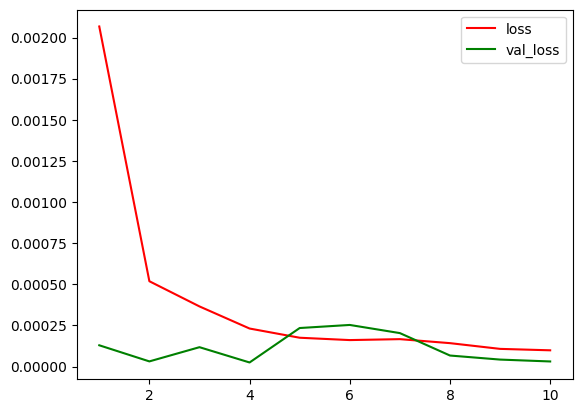

In [ ]:
epohe=range(1,11,1)
plt.plot(epohe,povijest_RNN.history['loss'],color='red',label='loss')
plt.plot(epohe,povijest_RNN.history['val_loss'],color='green',label='val_loss')

plt.legend()
plt.show()

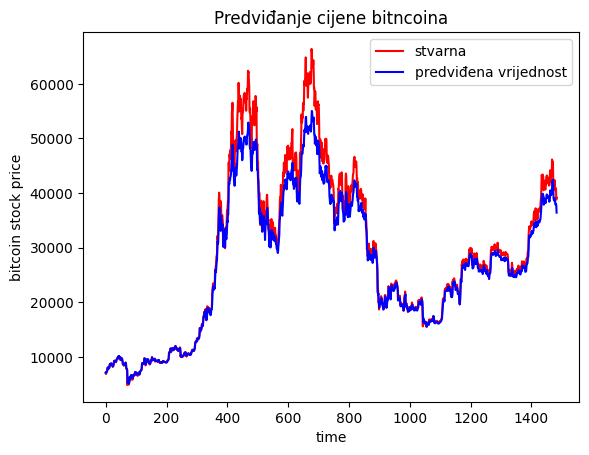

In [ ]:
plt.plot(b, color="red", label="stvarna")
plt.plot(predicted_RNN, color="blue", label="predviđena vrijednost")
plt.title("Predviđanje cijene bitncoina")
plt.xlabel("time")
plt.ylabel("bitcoin stock price")
plt.legend()
plt.show()

In [ ]:
train_predict_RNN=model_RNN.predict(x_train1)
test_predict_RNN=model_RNN.predict(x_test1)
train_predict_RNN.shape, test_predict_RNN.shape

47/47 [==============================] - 0s 3ms/step


((1202, 1), (1484, 1))

In [ ]:
train_predict_RNN = scaler.inverse_transform(train_predict_RNN)
test_predict_RNN = scaler.inverse_transform(test_predict_RNN)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:

print('Mjere evaluacije za RNN na skupovima za treniranje i testiranje')
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict_RNN)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict_RNN))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict_RNN))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict_RNN)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict_RNN))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict_RNN))

Mjere evaluacije za RNN na skupovima za treniranje i testiranje
Train data RMSE:  316.65409191145784
Train data MSE:  100269.81392427
Train data MAE:  191.87610712826017
-------------------------------------------------------------------------------------
Test data RMSE:  2870.61039497039
Test data MSE:  8240404.03971206
Test data MAE:  1762.15762724421


#LSTM

Osim što neuroni skrivenog sloja povratne neuronske mreže daju izlazne vrijednosti,
oni se također vežu i na same sebe kroz određeni vremenski period.

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=32,return_sequences=True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(units=32))
model_LSTM.add(Dense(units=1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam',metrics='mean_absolute_error')

In [ ]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 32)             4352      
                                                                 
 dropout_2 (Dropout)         (None, 3, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 32)             8320      
                                                                 
 dropout_3 (Dropout)         (None, 3, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025

In [ ]:
%%time
import time
povijest_LSTM=model_LSTM.fit(x_train1,y_train, epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
31/31 [==============================] - 7s 45ms/step - loss: 0.0026 - mean_absolute_error: 0.0390 - val_loss: 0.0108 - val_mean_absolute_error: 0.0796
Epoch 2/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0017 - mean_absolute_error: 0.0306 - val_loss: 0.0082 - val_mean_absolute_error: 0.0669
Epoch 3/10
31/31 [==============================] - 0s 8ms/step - loss: 0.0011 - mean_absolute_error: 0.0249 - val_loss: 0.0022 - val_mean_absolute_error: 0.0360
Epoch 4/10
31/31 [==============================] - 0s 10ms/step - loss: 1.9417e-04 - mean_absolute_error: 0.0105 - val_loss: 8.2171e-05 - val_mean_absolute_error: 0.0076
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 9.9194e-05 - mean_absolute_error: 0.0073 - val_loss: 2.4796e-05 - val_mean_absolute_error: 0.0032
Epoch 6/10
31/31 [==============================] - 0s 9ms/step - loss: 5.7256e-05 - mean_absolute_error: 0.0052 - val_loss: 4.1592e-05 - val_mean_absolute_error: 0.0047
E

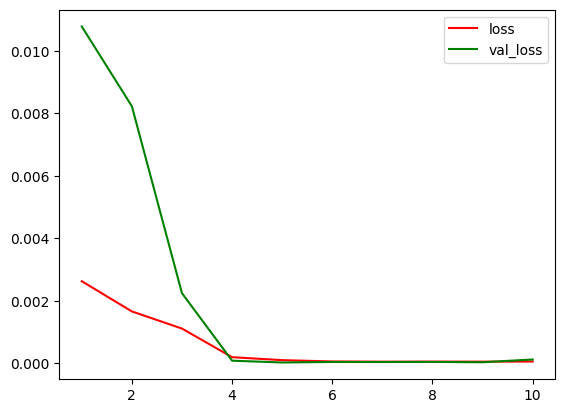

In [ ]:
epohe=range(1,11,1)
plt.plot(epohe,povijest_LSTM.history['loss'],color='red',label='loss')
plt.plot(epohe,povijest_LSTM.history['val_loss'],color='green',label='val_loss')
plt.legend()
plt.show()

In [ ]:
%%time
import time

predicted_LSTM=model_LSTM.predict(x_test1)
predicted_LSTM=scaler.inverse_transform(predicted_LSTM)

a=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

47/47 [==============================] - 1s 3ms/step
CPU times: user 1.17 s, sys: 22 ms, total: 1.19 s
Wall time: 1.15 s


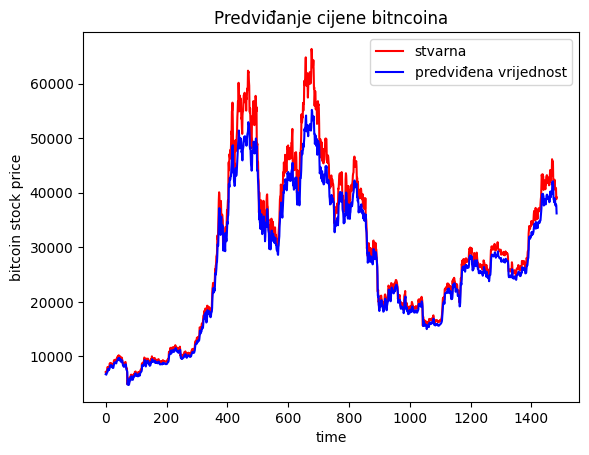

In [ ]:
plt.plot(a, color="red", label="stvarna")
plt.plot(predicted_LSTM, color="blue", label="predviđena vrijednost")
plt.title("Predviđanje cijene bitncoina")
plt.xlabel("time")
plt.ylabel("bitcoin stock price")
plt.legend()
plt.show()

In [ ]:
train_predict_LSTM=model_LSTM.predict(x_train1)
test_predict_LSTM=model_LSTM.predict(x_test1)
train_predict_LSTM.shape, test_predict_LSTM.shape

47/47 [==============================] - 0s 4ms/step


((1202, 1), (1484, 1))

In [ ]:
train_predict_LSTM = scaler.inverse_transform(train_predict_LSTM)
test_predict_LSTM = scaler.inverse_transform(test_predict_LSTM)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print('Mjere evaluacije za LSTM na skupovima za treniranje i testiranje')
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict_LSTM)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict_LSTM))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict_LSTM))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict_LSTM)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict_LSTM))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict_LSTM))

Mjere evaluacije za LSTM na skupovima za treniranje i testiranje
Train data RMSE:  525.5063792781147
Train data MSE:  276156.95466199366
Train data MAE:  428.2372265841188
-------------------------------------------------------------------------------------
Test data RMSE:  3022.5998464900185
Test data MSE:  9136109.832001485
Test data MAE:  2068.205084482485


#GRU

In [ ]:
model_GRU=Sequential()
model_GRU.add(GRU(32,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model_GRU.add(Dropout(0.20))
model_GRU.add(GRU(32,return_sequences=True))
model_GRU.add(Dropout(0.20))
model_GRU.add(GRU(32))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error',optimizer='adam',metrics='mean_absolute_error')

In [ ]:
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 32)             3360      
                                                                 
 dropout_4 (Dropout)         (None, 3, 32)             0         
                                                                 
 gru_1 (GRU)                 (None, 3, 32)             6336      
                                                                 
 dropout_5 (Dropout)         (None, 3, 32)             0         
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065

In [ ]:
%%time
import time
povijest_GRU=model_GRU.fit(x_train1,y_train, epochs=10,validation_split=0.2,batch_size=16,verbose=0)

CPU times: user 12 s, sys: 493 ms, total: 12.5 s
Wall time: 14.9 s


In [ ]:
%%time
import time
predicted_GRU=model_GRU.predict(x_test1)
predicted_GRU=scaler.inverse_transform(predicted_GRU)

c=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

47/47 [==============================] - 1s 3ms/step
CPU times: user 1.02 s, sys: 28.6 ms, total: 1.04 s
Wall time: 1.12 s


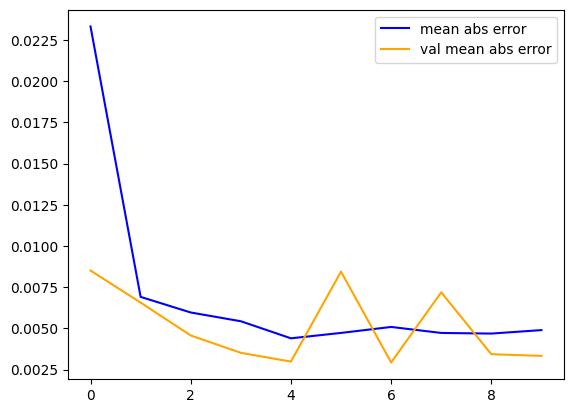

In [ ]:
plt.plot(povijest_GRU.history['mean_absolute_error'], color='blue', label='mean abs error')
plt.plot(povijest_GRU.history['val_mean_absolute_error'], color='orange', label='val mean abs error')
plt.legend()

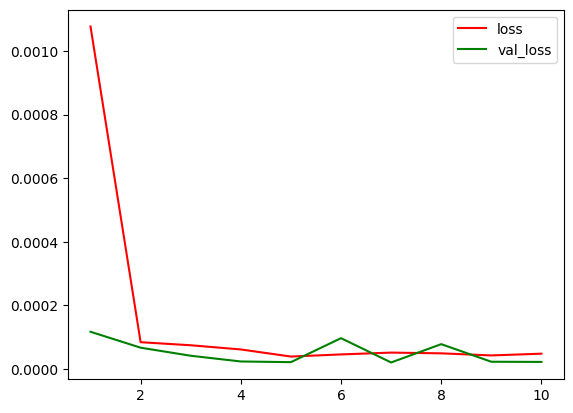

In [ ]:
epohe=range(1,11,1)
plt.plot(epohe,povijest_GRU.history['loss'],color='red',label='loss')
plt.plot(epohe,povijest_GRU.history['val_loss'],color='green',label='val_loss')
plt.legend()

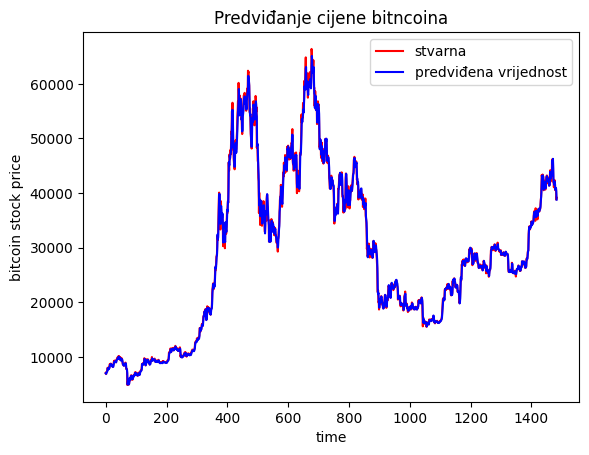

In [ ]:
plt.plot(c, color="red", label="stvarna")
plt.plot(predicted_GRU, color="blue", label="predviđena vrijednost")
plt.title("Predviđanje cijene bitncoina")
plt.xlabel("time")
plt.ylabel("bitcoin stock price")
plt.legend()
plt.show()

In [ ]:

train_predict_GRU=model_GRU.predict(x_train1)
test_predict_GRU=model_GRU.predict(x_test1)
train_predict_GRU.shape, test_predict_GRU.shape

47/47 [==============================] - 0s 3ms/step


((1202, 1), (1484, 1))

In [ ]:
train_predict_GRU = scaler.inverse_transform(train_predict_GRU)
test_predict_GRU = scaler.inverse_transform(test_predict_GRU)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:

print('Mjere evaluacije za GRU na skupovima za treniranje i testiranje')
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict_GRU)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict_GRU))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict_GRU))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict_GRU)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict_GRU))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict_GRU))

Mjere evaluacije za GRU na skupovima za treniranje i testiranje
Train data RMSE:  287.4074036989984
Train data MSE:  82603.01570099902
Train data MAE:  187.7833369083393
-------------------------------------------------------------------------------------
Test data RMSE:  811.5066501080848
Test data MSE:  658543.0431696456
Test data MAE:  502.4556084984985


#Usporedba

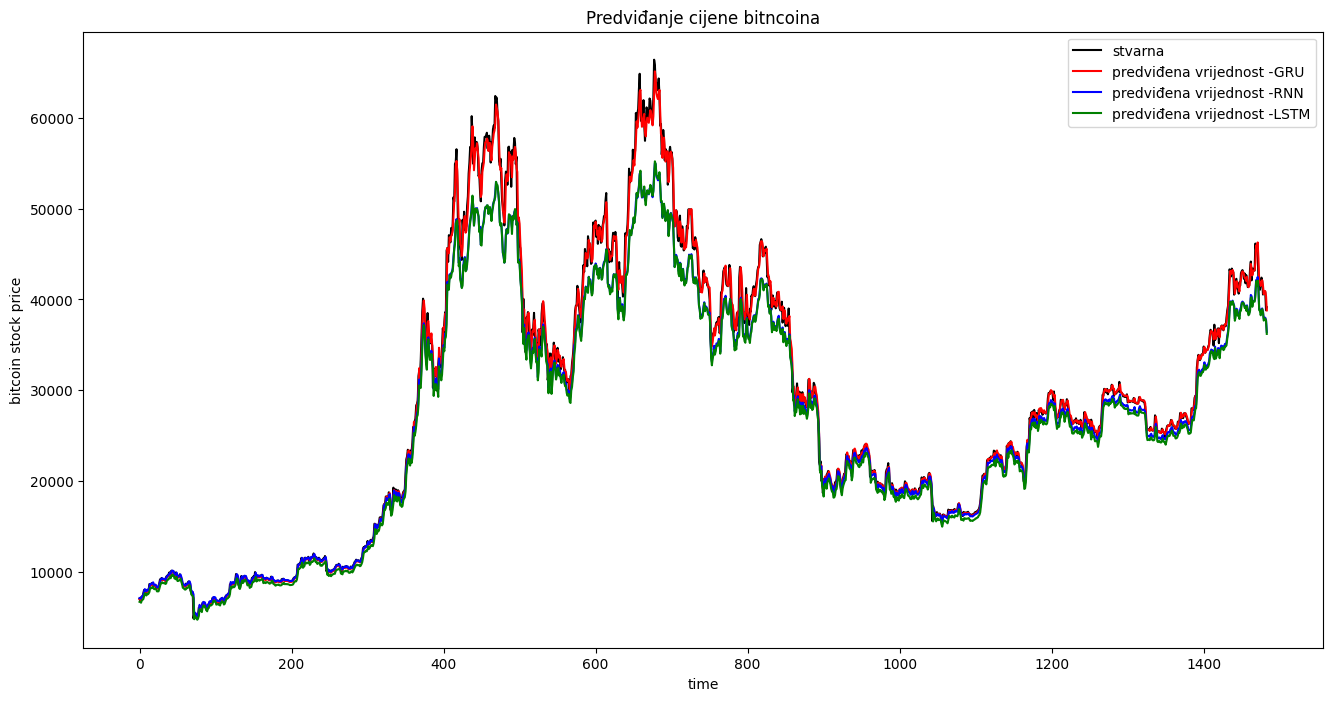

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(c, color="black", label="stvarna")
plt.plot(predicted_GRU, color="red", label="predviđena vrijednost -GRU")
plt.plot(predicted_RNN, color="blue", label="predviđena vrijednost -RNN")
plt.plot(predicted_LSTM, color="green", label="predviđena vrijednost -LSTM")
plt.title("Predviđanje cijene bitncoina")
plt.xlabel("time")
plt.ylabel("bitcoin stock price")
plt.legend()
plt.show()

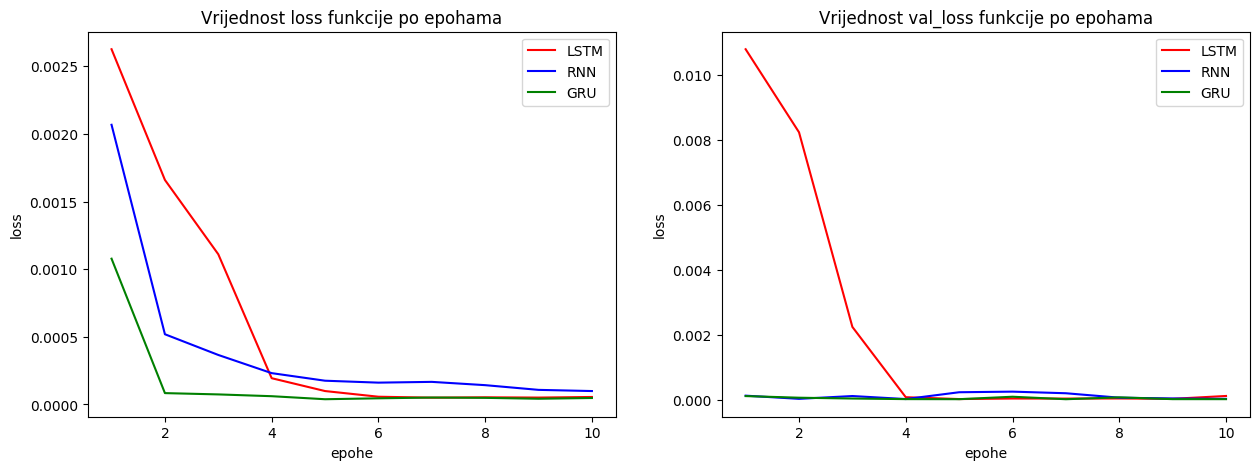

In [ ]:
epohe=range(1,11,1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epohe,povijest_LSTM.history['loss'], color='red', label='LSTM')
plt.plot(epohe,povijest_RNN.history['loss'], color='blue',label='RNN')
plt.plot(epohe,povijest_GRU.history['loss'], color='green', label='GRU')
plt.title('Vrijednost loss funkcije po epohama')
plt.ylabel('loss')
plt.xlabel('epohe')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epohe,povijest_LSTM.history['val_loss'], color='red', label='LSTM')
plt.plot(epohe,povijest_RNN.history['val_loss'], color='blue',label='RNN')
plt.plot(epohe,povijest_GRU.history['val_loss'], color='green', label='GRU')
plt.title('Vrijednost val_loss funkcije po epohama')
plt.ylabel('loss')
plt.xlabel('epohe')
plt.legend()